In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
#  Load Data
df = pd.read_excel("C://Users/admin/Documents/Customer Satisfaction/customer_support_tickets_final.xlsx")
df.shape

(2769, 19)

In [37]:
#Ensuring no null values
df.isnull().values.any()
df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Age group,Customer Gender,Product Purchased,Month-year,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Purchase_Year,Purchase_Month,Purchase_Weekday
0,3,519,844,48,3,2,10,10,4,8,53,0,343,2,3,3,2020,7,0
1,4,475,252,27,1,0,25,18,0,0,627,0,2549,2,3,3,2020,11,0


In [52]:
# Convert to datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')

# Extract useful info like year, month
df['Purchase_Year'] = df['Date of Purchase'].dt.year
df['Purchase_Month'] = df['Date of Purchase'].dt.month

# drop original datetime columns
df.drop(columns=['Date of Purchase', 'First Response Time', 'Time to Resolution'], inplace=True)


KeyError: 'Date of Purchase'

In [60]:
0#Define Features and Target
X = df.drop('Customer Satisfaction Rating', axis=1) #Feature
y = df['Customer Satisfaction Rating'] #target

In [62]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [64]:
#Encode Categorical Columns
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [66]:
# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
#Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
#Predict & Evaluate
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           1       0.18      0.19      0.19       109
           2       0.24      0.22      0.23       117
           3       0.23      0.27      0.25       112
           4       0.22      0.19      0.20       108
           5       0.18      0.17      0.17       108

    accuracy                           0.21       554
   macro avg       0.21      0.21      0.21       554
weighted avg       0.21      0.21      0.21       554



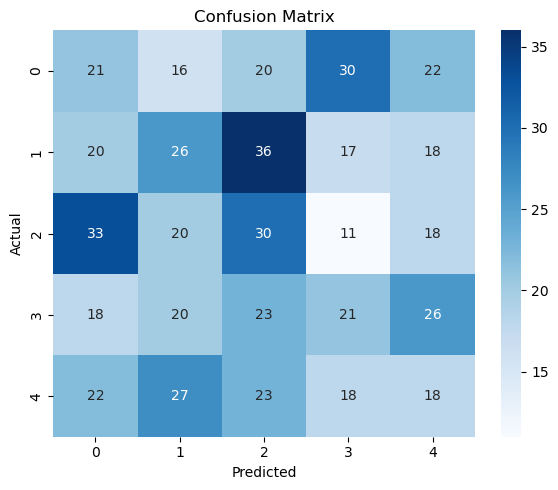

In [80]:
#Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

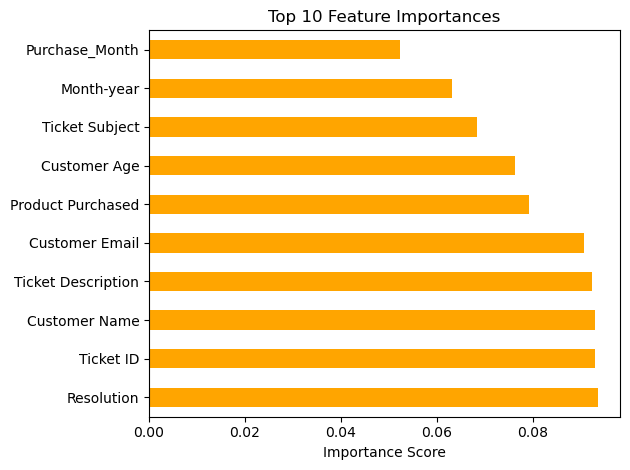

In [94]:
# Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()